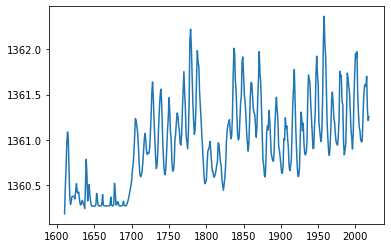

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("historical_tsi(1).csv")
plt.plot(data["Year"],data["Irri"])
# plt.xlim([1855,1867])
plt.show()

C:\Users\Kingster\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                               SARIMAX Results                                
Dep. Variable:                   Irri   No. Observations:                  118
Model:               SARIMAX(2, 1, 2)   Log Likelihood                  64.373
Date:                Sun, 13 Nov 2022   AIC                           -118.746
Time:                        14:41:21   BIC                           -104.935
Sample:                             0   HQIC                          -113.139
                                - 118                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6484      0.011    151.377      0.000       1.627       1.670
ar.L2         -0.9923      0.010    -96.119      0.000      -1.013      -0.972
ma.L1         -1.5678      0.057    -27.295      0.0

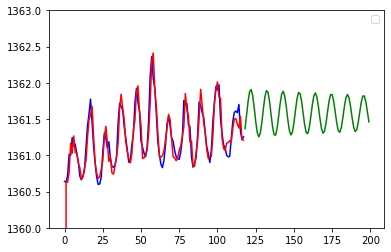

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv("irriMod.csv")
irri = data["Irri"]

model = SARIMAX(irri, order=(2,1,2),seasonal_order=(0,0,0,10)).fit()
print(model.summary())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data["Irri"],color="blue")
ax.plot(model.fittedvalues,color="red")
ax.plot(model.forecast(82),color="green")
plt.ylim([1360,1363])
plt.legend(loc="best")
print(model.forecast(82))
np.savetxt("irridiancePred.csv",model.forecast(82),delimiter=",",encoding="UTF-8")